#### Train the Neural Network for simulating XOR gate functionality using batch training algorithm

Import the required packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt

Declare input and target data

|input_1||input_2||target_output|
|-------||-------||-------------|
|0.1    || 0.1   ||0.1          |
|0.1    || 0.9   ||0.9          |
|0.9    || 0.1   ||0.9          |
|0.1    || 0.9   ||0.1          |

In [2]:
inputs = np.array([[0.1,0.1],[0.1,0.9],[0.9, 0.1],[0.9,0.9]])
inputs

array([[0.1, 0.1],
       [0.1, 0.9],
       [0.9, 0.1],
       [0.9, 0.9]])

In [3]:
expected_output = np.array([0.1, 0.9, 0.9, 0.1])
expected_output

array([0.1, 0.9, 0.9, 0.1])

#### Batch training
In each epoch all the training samples are considered for changing the weights.

In [4]:
def batch_training(x, y, learning_rate=0.01, error_threshold=0.01, print_messages=True):
    np.random.seed(4)
    weights_hidden = np.random.rand(2,2)
    bias_hidden=np.random.rand(1,2)
    weights_outer = np.random.rand(1,2)    
    bias_outer=np.random.rand(1,1)
    error=1
    iteration=1
    error_in_iterations=[]
    weights_hidden_array=[]
    bias_hidden_array=[]
    weights_outer_array=[]
    bias_outer_array=[]
    while(error>error_threshold):
        weights_hidden_array.append(weights_hidden)
        bias_hidden_array.append(bias_hidden)
        weights_outer_array.append(weights_outer)
        bias_outer_array.append(bias_outer)
        if print_messages:
            print("Iteration: ", iteration)
            print("================================")
            print("weights_hidden: ", weights_hidden)
            print("weights_outer: ", weights_outer)     
            print("bias_hidden: ", bias_hidden)
            print("bias_outer: ", bias_outer)
        
        hidden_output=np.dot(weights_hidden, np.transpose(x)) + \
                      np.transpose(bias_hidden)
        hidden_output=1.0/(1+np.exp(-hidden_output))
        if print_messages:
            print("Hidden Output: ", hidden_output)
        output = np.dot(weights_outer, hidden_output) + bias_outer
        output = 1.0/(1+np.exp(-output))
        if print_messages:
            print("Output: ", output)
        error=np.sum(np.power((output-y), 2))
        error_in_iterations.append(error)
        if print_messages:
            print("Error: ", error)
        #BackPropogation Starts:
        #Layer-2 Change in weights:
        change_in_error=(y-output)*output*(1-output)
        change_in_wt_outer=-learning_rate*np.dot(change_in_error, \
                                                 np.transpose(hidden_output))
        change_in_bias_outer= -learning_rate*np.dot(change_in_error, \
                                                    np.ones(shape=(4,1)))
        
        #Layer-1 Change in weights:
        change_in_wt_hidden = np.dot(np.transpose(weights_outer), change_in_error)
        change_in_wt_hidden = change_in_wt_hidden*hidden_output*(1-hidden_output)
        change_in_wt_hidden = -learning_rate * np.dot(change_in_wt_hidden, x)
        
        change_in_bias_hidden= -np.dot(learning_rate * \
                                       np.dot(np.transpose(weights_outer), \
                                              change_in_error) * \
                                       hidden_output*(1-hidden_output), \
                                       np.ones(shape=(4,1)))

        weights_outer=weights_outer-change_in_wt_outer
        bias_outer = bias_outer - change_in_bias_outer 
                                      
        weights_hidden=weights_hidden-change_in_wt_hidden
        bias_hidden=bias_hidden-change_in_bias_hidden.T
        
        #BackPropogation ends
        
        iteration+=1
    if print_messages:
        print("Weights Converged!!!!")
        print("weights_outer:", np.concatenate((bias_outer, weights_outer), axis=1))
        print("weights_hidden:", np.concatenate((np.transpose(bias_hidden), \
                                                 weights_hidden), axis=1))
        print("Output:", output)    
        print("Iteration Count:", iteration-1)
    return iteration-1, \
           np.concatenate((bias_outer, weights_outer), axis=1), \
           np.concatenate((np.transpose(bias_hidden), weights_hidden), axis=1), \
           np.array(weights_hidden_array), \
           np.array(bias_hidden_array), \
           np.array(weights_outer_array), \
           np.array(bias_outer_array), \
           np.array(error_in_iterations)

In [5]:
num_of_epochs, outer_weights, hidden_weights, \
hidden_epoch_weights, bias_hidden_epochs, \
outer_epoch_weights, bias_outer_epochs, error_in_epochs = \
batch_training(inputs, expected_output, \
               learning_rate=0.1, print_messages=False)

Number of epochs processed to converge are

In [6]:
num_of_epochs

8310

Final Weights obtained using batch training are

In [7]:
print("Layer-1 Weights: ", hidden_weights)
print("Layer-2 Weights: ", outer_weights)

Layer-1 Weights:  [[-2.65617041  5.59712625  5.53236647]
 [-4.60017538  3.22538831  3.20917925]]
Layer-2 Weights:  [[-2.73183881  6.12204823 -6.59371579]]


Plotting the line and Points using batch training

Text(0.5, 1.0, 'Plot of regions seperating data points simulating XOR gate')

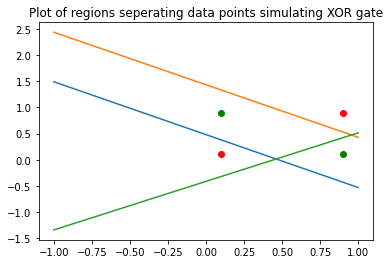

In [8]:
x_p=np.linspace(-1,1,10000)
y_p_1=-((hidden_weights[0][0]/hidden_weights[0][2])+ \
     ((hidden_weights[0][1]/hidden_weights[0][2])*x_p))
y_p_2=-((hidden_weights[1][0]/hidden_weights[1][2])+ \
     ((hidden_weights[1][1]/hidden_weights[1][2])*x_p))
y_p_3=-((outer_weights[0][0]/outer_weights[0][2])+ \
     ((outer_weights[0][1]/outer_weights[0][2])*x_p))
plt.plot(0.1, 0.1, 'ro')
plt.plot(0.1, 0.9, 'go')
plt.plot(0.9, 0.1, 'go')
plt.plot(0.9, 0.9, 'ro')
plt.plot(x_p,y_p_1)
plt.plot(x_p,y_p_2)
plt.plot(x_p,y_p_3)
plt.title("Plot of regions seperating data points simulating XOR gate")

#### Plots for Batch training process
Epochs vs Error

In [9]:
hidden_resized=np.reshape(hidden_epoch_weights, \
                          newshape=(num_of_epochs,4))
bias_resized=np.reshape(bias_hidden_epochs, \
                        newshape=(num_of_epochs,2))
hw11=hidden_resized[:,0]
hw12=hidden_resized[:,1]
hw21=hidden_resized[:,2]
hw22=hidden_resized[:,3]
hw31=bias_resized[:,0]
hw32=bias_resized[:,1]

outer_epoch_weights_resized=np.reshape(outer_epoch_weights, \
                                       newshape=(num_of_epochs,2))
bias_outer_epochs=np.reshape(bias_outer_epochs, \
                             newshape=(num_of_epochs,1))
ow11=outer_epoch_weights_resized[:,0]
ow12=outer_epoch_weights_resized[:,1]
ow13=bias_outer_epochs[:,0]

As the number of epochs increases, error will decrease. This is because training time with increase in number of iterations casuing to fit the model more effectively.

Text(0, 0.5, 'Errors')

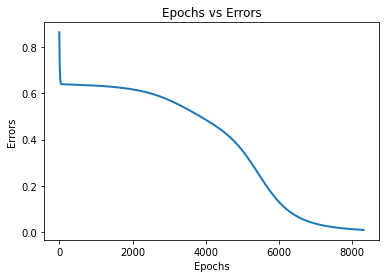

In [10]:
plt.plot(np.linspace(1,num_of_epochs, num_of_epochs), \
         error_in_epochs, linewidth=2.0)
plt.title("Epochs vs Errors")
plt.xlabel("Epochs")
plt.ylabel("Errors")

Epochs vs hidden layer weights in each epoch

Text(0, 0.5, 'Hidden Weights')

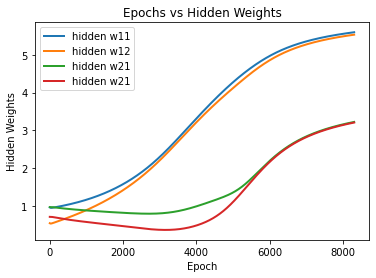

In [11]:
plt.plot(np.linspace(1,num_of_epochs,num_of_epochs),\
         hw11,linewidth=2.0, label="hidden w11")
plt.plot(np.linspace(1,num_of_epochs,num_of_epochs),\
         hw12,linewidth=2.0, label="hidden w12")
plt.plot(np.linspace(1,num_of_epochs,num_of_epochs),\
         hw21,linewidth=2.0, label="hidden w21")
plt.plot(np.linspace(1,num_of_epochs,num_of_epochs),\
         hw22,linewidth=2.0, label="hidden w21")
plt.title("Epochs vs Hidden Weights")
plt.xlabel("Epoch")
plt.legend(loc="upper left")
plt.ylabel("Hidden Weights")

Epochs vs Hidden layer bias in each epoch

Text(0, 0.5, 'Hidden Bias')

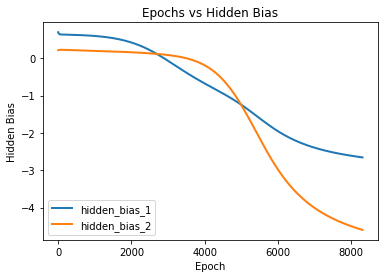

In [12]:
plt.plot(np.linspace(1,num_of_epochs,num_of_epochs),\
         hw31,linewidth=2.0, label="hidden_bias_1")
plt.plot(np.linspace(1,num_of_epochs,num_of_epochs),\
         hw32,linewidth=2.0, label="hidden_bias_2")
plt.title("Epochs vs Hidden Bias")
plt.xlabel("Epoch")
plt.legend(loc="lower left")
plt.ylabel("Hidden Bias")

Epochs vs Outer layer weights in each epoch

Text(0, 0.5, 'Outer Weights')

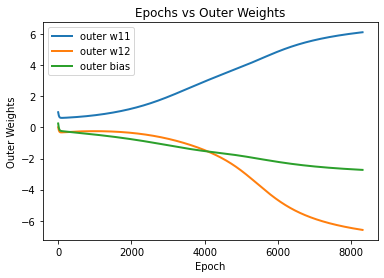

In [13]:
plt.plot(np.linspace(1,num_of_epochs,num_of_epochs),\
         ow11,linewidth=2.0, label="outer w11")
plt.plot(np.linspace(1,num_of_epochs,num_of_epochs),\
         ow12,linewidth=2.0, label="outer w12")
plt.plot(np.linspace(1,num_of_epochs,num_of_epochs),\
         ow13,linewidth=2.0, label="outer bias")
plt.title("Epochs vs Outer Weights")
plt.xlabel("Epoch")
plt.legend(loc="upper left")
plt.ylabel("Outer Weights")

Learning Rates vs Iteration:
As the learning rate decrease, number of itrations required for converging  increases as expected

In [14]:
def play_with_learning_rate(input_data, target_data, do_batch=True):
    iteration_per_rate=[]
    learning_rates=np.linspace(0.01, 1, 100)
    for lr_rate in learning_rates:
        if do_batch:
            iterations, outer_weights, hidden_weights, \
            hidden_epoch_weights, bias_hidden_epochs, \
            outer_epoch_weights, bias_outer_epochs, error_in_epochs = \
            batch_training(inputs, expected_output, \
                           learning_rate=lr_rate, print_messages=False)
        else:
            iterations, outer_layer_weights, \
            hidden_layer_weights, weights_hidden_array, \
            bias_hidden_array, weights_outer_array, \
            bias_outer_array, error_in_iterations, = \
            online_training(inputs, expected_output, \
                            learning_rate=lr_rate, epochs=30000000, \
                            print_messages=False)
        iteration_per_rate.append(iterations)
    plt.plot(np.array(iteration_per_rate), learning_rates)
    plt.title("Iterations vs Learning Rate")
    plt.xlabel("Iteration")
    plt.ylabel("Learning Rate")

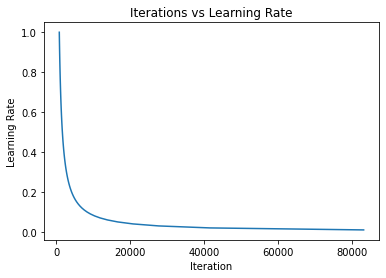

In [15]:
play_with_learning_rate(inputs, expected_output)

#### Online Training
Instead of considering every training sample for updating weights, each data point is used to update them

In [16]:
def online_training(x, y, learning_rate=0.01, error_threshold=0.01, \
                    epochs=300000, print_messages=True):
    np.random.seed(4)
    weights_hidden = np.random.rand(2,2)
    bias_hidden=np.random.rand(1,2)
    weights_outer = np.random.rand(1,2)    
    bias_outer=np.random.rand(1,1)
    iteration=1
    error_in_iterations=[]
    weights_hidden_array=[]
    bias_hidden_array=[]
    weights_outer_array=[]
    bias_outer_array=[]
    while iteration < epochs:
        error=0
        outputs=[]
        if print_messages:
            print("Iteration:", iteration)
            print("===================================")
            print("weights_outer:", weights_outer)
            print("bias_outer:", bias_outer)
            print("weights_hidden:", weights_hidden)
            print("bias_hidden:", bias_hidden)
            
        for x_i, y_i in zip(x,y):
            hidden_output=np.dot(weights_hidden, x_i) + bias_hidden
            hidden_output=1.0/(1+np.exp(-hidden_output))
            
            output = np.dot(weights_outer, hidden_output.T) + bias_outer
            output = 1.0/(1+np.exp(-output))
            outputs.append(output)
            
            error=error + np.power((output-y_i), 2) 
            change_in_error=(y_i-output)*output*(1-output)
               
            change_in_wt_outer=-learning_rate * hidden_output * change_in_error
            change_in_bias_outer= -learning_rate*change_in_error
            
            change_in_wt_hidden = weights_outer*change_in_error
            change_in_wt_hidden = change_in_wt_hidden*hidden_output*(1-hidden_output)
            change_in_wt_hidden = -learning_rate * np.dot(\
                                                   np.transpose(change_in_wt_hidden), \
                                                   np.reshape(x_i, newshape=(1,2)))
            change_in_bias_hidden = -learning_rate * weights_outer*change_in_error * \
                                      hidden_output*(1-hidden_output)

            weights_outer=weights_outer-change_in_wt_outer
            bias_outer = bias_outer - change_in_bias_outer
            weights_hidden=weights_hidden-change_in_wt_hidden
            bias_hidden=bias_hidden-change_in_bias_hidden         
            
        iteration+=1
        error_in_iterations.append(error)
        weights_hidden_array.append(weights_hidden)
        bias_hidden_array.append(bias_hidden)
        weights_outer_array.append(weights_outer)
        bias_outer_array.append(bias_outer)
        if error < error_threshold:
            break
    return iteration-1, \
           np.concatenate((bias_outer, weights_outer), axis=1), \
           np.concatenate((np.transpose(bias_hidden), weights_hidden), axis=1), \
           np.array(weights_hidden_array), \
           np.array(bias_hidden_array), \
           np.array(weights_outer_array), \
           np.array(bias_outer_array), \
           np.array(error_in_iterations)

In [17]:
num_of_epochs, outer_layer_weights, \
hidden_layer_weights, weights_hidden_array, \
bias_hidden_array, weights_outer_array, \
bias_outer_array, error_in_iterations, = \
online_training(inputs, expected_output, \
                learning_rate=0.1, epochs=300000, print_messages=False)

Usually, number of epochs for weight convergence in online learning(stocastic gradient descet) will be less than in batch training. Number of epochs for convergence are

In [18]:
num_of_epochs

8281

Final weights obtained after online training are

In [19]:
print("Layer-1 Weights: ", hidden_layer_weights)
print("Layer-2 Weights: ", outer_layer_weights)

Layer-1 Weights:  [[-2.65263821  5.58474221  5.51410852]
 [-4.62832095  3.24599246  3.22491805]]
Layer-2 Weights:  [[-2.73109038  6.11144124 -6.58199231]]


Plot of points and obtained regions using online training

Text(0.5, 1.0, 'Plot of regions seperating data points simulating XOR gate')

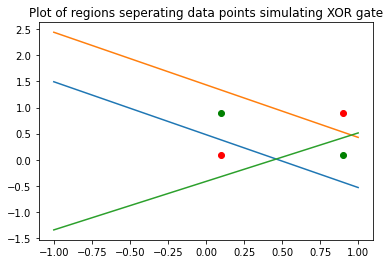

In [20]:
x_p=np.linspace(-1,1,1000)
y_p_1=-((hidden_layer_weights[0][0]/hidden_layer_weights[0][2])+ \
     ((hidden_layer_weights[0][1]/hidden_layer_weights[0][2])*x_p))

y_p_2=-((hidden_layer_weights[1][0]/hidden_layer_weights[1][2])+ \
     ((hidden_layer_weights[1][1]/hidden_layer_weights[1][2])*x_p))

y_p_3=-((outer_layer_weights[0][0]/outer_layer_weights[0][2])+ \
     ((outer_layer_weights[0][1]/outer_layer_weights[0][2])*x_p))
plt.plot(0.1, 0.1, 'ro')
plt.plot(0.1, 0.9, 'go')
plt.plot(0.9, 0.1, 'go')
plt.plot(0.9, 0.9, 'ro')
plt.plot(x_p,y_p_1)
plt.plot(x_p,y_p_2)
plt.plot(x_p,y_p_3)
plt.title("Plot of regions seperating data points simulating XOR gate")

#### Plots for Online training process

In [21]:
hidden_resized=np.reshape(weights_hidden_array, \
                          newshape=(num_of_epochs,4))
bias_resized=np.reshape(bias_hidden_array, \
                        newshape=(num_of_epochs,2))
hw11=hidden_resized[:,0]
hw12=hidden_resized[:,1]
hw21=hidden_resized[:,2]
hw22=hidden_resized[:,3]
hw31=bias_resized[:,0]
hw32=bias_resized[:,1]

outer_epoch_weights_resized=np.reshape(weights_outer_array, \
                                       newshape=(num_of_epochs,2))
bias_outer_epochs=np.reshape(bias_outer_array, \
                             newshape=(num_of_epochs,1))
ow11=outer_epoch_weights_resized[:,0]
ow12=outer_epoch_weights_resized[:,1]
ow13=bias_outer_epochs[:,0]

Number of Epochs vs Error during Online learning

Text(0, 0.5, 'Errors')

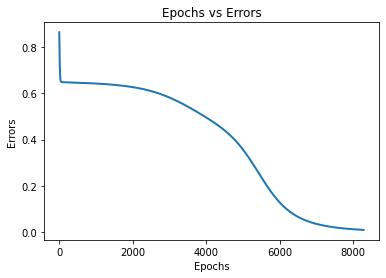

In [22]:
plt.plot(np.linspace(1,num_of_epochs, num_of_epochs), \
         np.ravel(error_in_iterations), linewidth=2.0)
plt.title("Epochs vs Errors")
plt.xlabel("Epochs")
plt.ylabel("Errors")

Hidden Weights vs Number of Epochs

Text(0, 0.5, 'Hidden Weights')

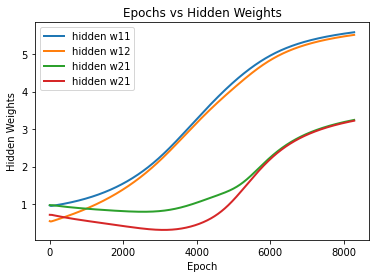

In [23]:
plt.plot(np.linspace(1,num_of_epochs,num_of_epochs),\
         hw11,linewidth=2.0, label="hidden w11")
plt.plot(np.linspace(1,num_of_epochs,num_of_epochs),\
         hw12,linewidth=2.0, label="hidden w12")
plt.plot(np.linspace(1,num_of_epochs,num_of_epochs),\
         hw21,linewidth=2.0, label="hidden w21")
plt.plot(np.linspace(1,num_of_epochs,num_of_epochs),\
         hw22,linewidth=2.0, label="hidden w21")
plt.title("Epochs vs Hidden Weights")
plt.xlabel("Epoch")
plt.legend(loc="upper left")
plt.ylabel("Hidden Weights")

Hidden Layer Bias vs Number of Epochs

Text(0, 0.5, 'Hidden Bias')

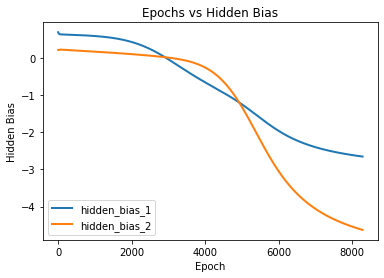

In [24]:
plt.plot(np.linspace(1,num_of_epochs,num_of_epochs),\
         hw31,linewidth=2.0, label="hidden_bias_1")
plt.plot(np.linspace(1,num_of_epochs,num_of_epochs),\
         hw32,linewidth=2.0, label="hidden_bias_2")
plt.title("Epochs vs Hidden Bias")
plt.xlabel("Epoch")
plt.legend(loc="lower left")
plt.ylabel("Hidden Bias")

Outer layer weights vs number of epochs

Text(0, 0.5, 'Outer Weights')

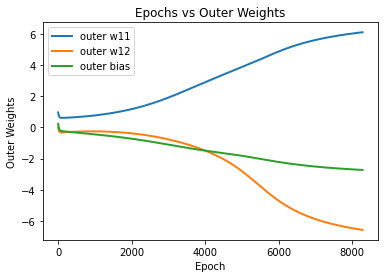

In [25]:
plt.plot(np.linspace(1,num_of_epochs,num_of_epochs),\
         ow11,linewidth=2.0, label="outer w11")
plt.plot(np.linspace(1,num_of_epochs,num_of_epochs),\
         ow12,linewidth=2.0, label="outer w12")
plt.plot(np.linspace(1,num_of_epochs,num_of_epochs),\
         ow13,linewidth=2.0, label="outer bias")
plt.title("Epochs vs Outer Weights")
plt.xlabel("Epoch")
plt.legend(loc="upper left")
plt.ylabel("Outer Weights")

Learning rates vs Iterations

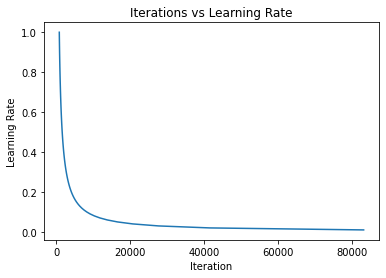

In [26]:
play_with_learning_rate(inputs, expected_output, do_batch=False)